# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [3]:
# Import the necessary CSVs to Pandas DataFrames

file_path = Path("Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

coordinates_path = Path("Instructions/Starter_Code/Data/neighborhoods_coordinates.csv")
neighborhood_data = pd.read_csv(coordinates_path)
neighborhood_data = neighborhood_data.set_index('Neighborhood')
neighborhood_data.index.rename('neighborhood', inplace=True)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [28]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # Calculate the mean number of housing units per year (hint: use groupby) 
    mean_housing = sfo_data.groupby('year').mean()
    housing_df = pd.DataFrame(mean_housing['housing_units'])

    # Use the Pandas plot function to plot the average housing units per year.
    housing_plot = housing_df.plot.bar()
    ax = plt.gca()
    ymin = housing_df['housing_units'].min()
    ymax = housing_df['housing_units'].max()
    stdev = housing_df['housing_units'].std()
    ax.set_ylim([ymin - stdev, ymax + stdev])

    return housing_plot

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    sale_rent_costs = sfo_data.drop(columns=['housing_units']).groupby('year').mean()

    # Line chart for average sale price per square foot
    plt.subplot(2,1,1) #using subplots to separate both charts
    avg_sale_price = sale_rent_costs['sale_price_sqr_foot'].plot.line(color='black', title = 'Average Sale Price Per Square Foot vs. Year')

    # Line chart for average montly rent
    plt.subplot(2,1,2) #using subplots to separate both charts
    avg_monthly_rent = sale_rent_costs['gross_rent'].plot.line(color = 'red', title = 'Average Monthly Rent Cost vs. Year')

    plt.tight_layout()

    return plt


def average_sales_price():
    """Average Sales Price Per Year."""
    
    neighborhood_costs_df = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()
    hv_plot = neighborhood_costs_df.hvplot(x='year', y='sale_price_sqr_foot', groupby='neighborhood', xlabel = 'Year', ylabel = 'Average Sale Price per Square Foot')

    return hv_plot


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    neighborhood_costs_df = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()
    hv_plot = neighborhood_costs_df.hvplot(x='year', y='gross_rent', groupby='neighborhood', xlabel = 'Year', ylabel = 'Average Monthly Rent')

    return hv_plot


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    # Getting the data from the top 10 expensive neighborhoods to own
    sorted_most_expensive = sfo_data.groupby(['neighborhood']).mean().sort_values('sale_price_sqr_foot', ascending=False).reset_index()
    top10_most_expensive = sorted_most_expensive.head(10)
    hv_plot = top10_most_expensive.hvplot.bar(x='neighborhood', y='sale_price_sqr_foot', rot=90, xlabel = 'Neighborhood', ylabel = 'Avg Sale Price per sqft', figsize=(20,10))

    return hv_plot


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # Plotting the data from the top 10 expensive neighborhoods
        
    sorted_most_expensive = sfo_data.groupby(['neighborhood']).mean().sort_values('sale_price_sqr_foot', ascending=False).reset_index()
    top10_most_expensive = sorted_most_expensive.head(10)
    neighborhood_costs_df = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()

    # save the names of the 10 most expensive neighborhoods in a variable
    top10_names = list(top10_most_expensive['neighborhood'])

    # create new data frame with data for only the top 10 most expensive neighborhoods
    top10_neighborhood_costs_df = neighborhood_costs_df.loc[neighborhood_costs_df['neighborhood'].isin(top10_names)] 

    # plotting sales price and rental price of the top 10 most expensive neighborhoods
    hv_plot = top10_neighborhood_costs_df.hvplot.bar(groupby='neighborhood', rot=90, x='year', y=['sale_price_sqr_foot', 'gross_rent'], ylabel='Num Housing Units')

    return hv_plot
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    neighborhood_costs_df = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()

    sorted_most_expensive = sfo_data.groupby(['neighborhood']).mean().sort_values('sale_price_sqr_foot', ascending=False).reset_index()
    top10_most_expensive = sorted_most_expensive.head(10)

    # save the names of the 10 most expensive neighborhoods in a variable
    top10_names = list(top10_most_expensive['neighborhood'])

    # create new data frame with data for only the top 10 most expensive neighborhoods
    top10_neighborhood_costs_df = neighborhood_costs_df.loc[neighborhood_costs_df['neighborhood'].isin(top10_names)] 
    top10 = top10_neighborhood_costs_df.head(10)

    parallel_coordinates_plot = px.parallel_coordinates(  
        top10, 
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units","gross_rent"],
        color="year",
    )
    
    return parallel_coordinates_plot


def parallel_categories():
    """Parallel Categories Plot."""
    
    neighborhood_costs_df = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()

    sorted_most_expensive = sfo_data.groupby(['neighborhood']).mean().sort_values('sale_price_sqr_foot', ascending=False).reset_index()
    top10_most_expensive = sorted_most_expensive.head(10)

    # save the names of the 10 most expensive neighborhoods in a variable
    top10_names = list(top10_most_expensive['neighborhood'])

    # create new data frame with data for only the top 10 most expensive neighborhoods
    top10_neighborhood_costs_df = neighborhood_costs_df.loc[neighborhood_costs_df['neighborhood'].isin(top10_names)] 
    top10 = top10_neighborhood_costs_df.head(10)
    parallel_categories_plot = px.parallel_categories(
        top10, 
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units","gross_rent"],
        color="year",
    )
    return parallel_categories_plot


def neighborhood_map():
    """Neighborhood Map."""

    sfo_data['neighborhood'] = sfo_data['neighborhood'].str.rstrip()
    # Note: noticed there was white space after some of the neighborhoods and was giving me problems with concatenation on next box

    neighborhood_mean_costs = sfo_data.groupby('neighborhood').mean()
    
    # Join the average values with the neighborhood locations
    concat_df = pd.concat([neighborhood_mean_costs, neighborhood_data], axis=1)
    
    # Set the mapbox access token
    px.set_mapbox_access_token(map_box_api)

    # Create a scatter mapbox to analyze neighborhood info
    map_plot = px.scatter_mapbox(
        concat_df,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        width=1000, 
        height=1000
    )
    return map_plot


def sunburst():
    """Sunburst Plot."""
    
    neighborhood_costs_df = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()

    sorted_most_expensive = sfo_data.groupby(['neighborhood']).mean().sort_values('sale_price_sqr_foot', ascending=False).reset_index()
    top10_most_expensive = sorted_most_expensive.head(10)

    # save the names of the 10 most expensive neighborhoods in a variable
    top10_names = list(top10_most_expensive['neighborhood'])

    # create new data frame with data for only the top 10 most expensive neighborhoods
    top10_neighborhood_costs_df = neighborhood_costs_df.loc[neighborhood_costs_df['neighborhood'].isin(top10_names)] 
    
    sunburst_plot = px.sunburst(
        top10_neighborhood_costs_df, 
        path=['year','neighborhood'], 
        values='sale_price_sqr_foot',
        color='gross_rent',
        width=800,
        height=800
    )

    return sunburst_plot


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

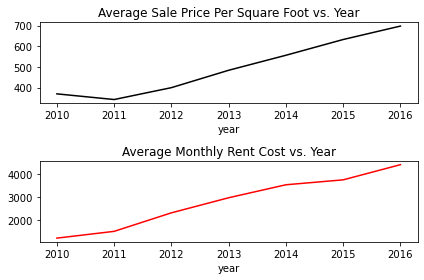

In [29]:
# Create a Title for the Dashboard

dashboard_title = pn.pane.Markdown(
    """
        # Real Estate Market in San Francisco
        ## Click through the different tabs to learn more about the market!
    """
)

# Create a tab layout for the dashboard

tab_1 = pn.Column(
    "# Summary",
    housing_units_per_year(),
    average_gross_rent()
)

tab_2 = pn.Column(
    "# Historical Data 2010-2016",
    average_sales_price(),
    average_price_by_neighborhood()
)

tab_3 = pn.Column(
    "# Neighborhoods Map",
    neighborhood_map()
)

tab_4 = pn.Column(
    "# Most Expensive Neighborhoods",
    top_most_expensive_neighborhoods(),
    most_expensive_neighborhoods_rent_sales()
)

tab_5 = pn.Column(
    "# Parallel Graphs",
    parallel_coordinates(),
    parallel_categories()
)


tab_6 = pn.Row(
    "# Sunburst Chart",
    sunburst()
)



# Create the dashboard

dashboard = pn.Tabs(
    ("Welcome", dashboard_title),
    ("Summary", tab_1),
    ("Search by Neighborhood",tab_2),
    ("Map", tab_3),
    ("Most Expensive",tab_4),
    ("Explore Parallels",tab_5),
    ("Sunburst", tab_6)
)

## Serve the Panel Dashboard

In [17]:
# Serve the# dashboard
dashboard.servable()

Tabs
    [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure, visible=False)
    [4] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Cow Hollow', ...], value='Cow Hollow', width=250)
                [1] VSpacer()
    [5] Column
        [0] Markdown(str)
        [1] Plotly(Figure, visible=False)
        [2] Plotly(Figure, visible=False)
    [6] Row
        [0] Markdown(str)
        [1] Plotly(Figure, visible=False)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

<AxesSubplot:xlabel='year'>

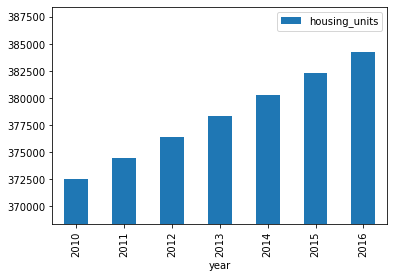

In [11]:
# housing_units_per_year()

<AxesSubplot:title={'center':'Average Monthly Rent Cost vs. Year'}, xlabel='year'>

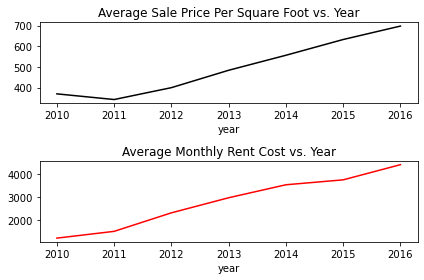

In [12]:
# average_gross_rent()

In [14]:
# average_sales_price()

BokehModel(combine_events=True, render_bundle={'docs_json': {'5bb9ce49-e316-4490-9c05-54973ec2ba82': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [15]:
# average_price_by_neighborhood()

BokehModel(combine_events=True, render_bundle={'docs_json': {'ddc1175d-80d8-4f89-9375-07cb4b7901a6': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

In [16]:
# top_most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [17]:
# most_expensive_neighborhoods_rent_sales()

BokehModel(combine_events=True, render_bundle={'docs_json': {'953836d6-ad5f-4cfd-84d2-07bacfb8d6cd': {'defs': …

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

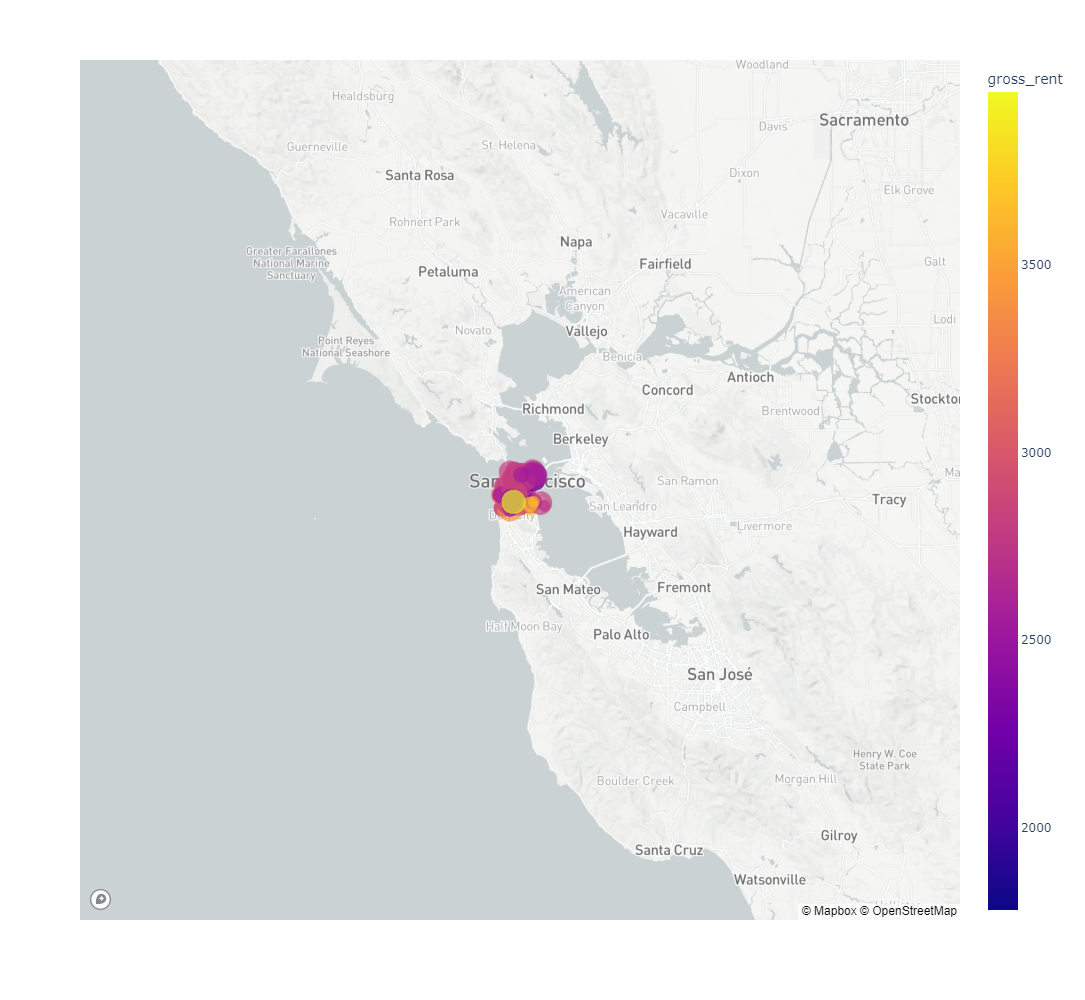

In [18]:
# neighborhood_map().show()

In [19]:
# parallel_categories()

In [20]:
# parallel_coordinates()

In [21]:
# sunburst()